<a href="https://colab.research.google.com/github/Malinovskiy159/web/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [18]:
data_path = '/content/drive/MyDrive/datasets/heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(data_path)

In [19]:
print(data.head())
print(data.info())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

In [20]:
data = data.dropna()

In [21]:
#categorical_columns = ['']
#data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [22]:
target_column = 'target'
X = data.drop(columns=[target_column])
y = data[target_column]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
models = {
    "SVC": SVC(probability=True),
    "LogisticRegression": LogisticRegression(max_iter=1500, solver='saga'),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

In [26]:
param_grids = {
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "GradientBoostingClassifier": {"n_estimators": [100, 150, 200], "learning_rate": [0.1, 0.2, 0.3]}
}

In [27]:
best_models = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Training SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1}

Training GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'n_estimators': 200}



Classification report for SVC:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.92      0.89      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.93      0.95      0.94       131

    accuracy                           0.93     

<Figure size 1000x800 with 0 Axes>

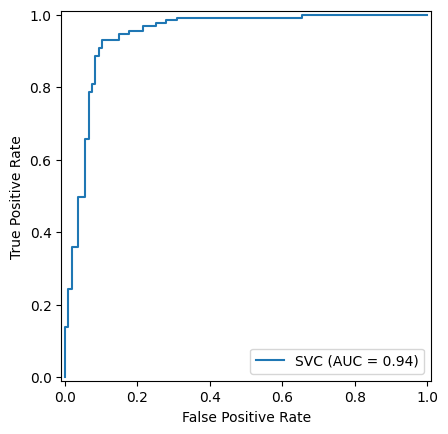

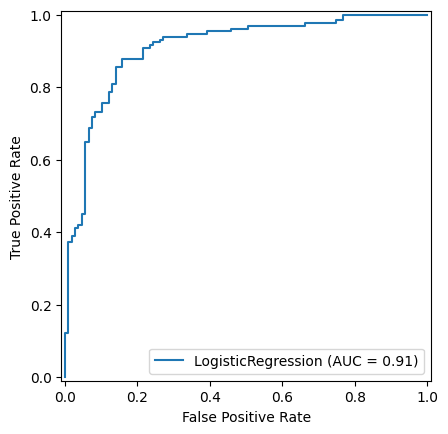

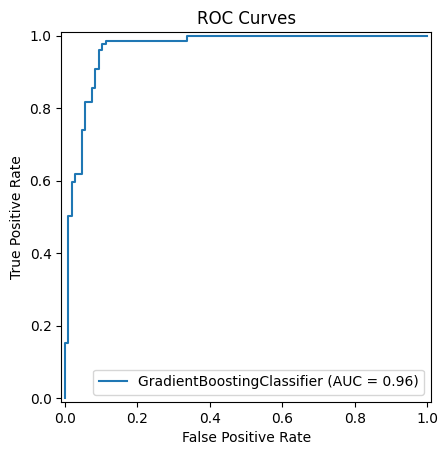

In [28]:
plt.figure(figsize=(10, 8))

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification report for {model_name}:")
    print(classification_report(y_test, y_pred))

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot()

plt.title("ROC Curves")
plt.legend(loc='lower right')
plt.show()

In [29]:
auc_scores = {}

for model_name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores[model_name] = roc_auc

In [30]:
best_model_name = max(auc_scores, key=auc_scores.get)
print(f"\nЛучшая модель на основе AUC: {best_model_name} с AUC = {auc_scores[best_model_name]:.4f}")


Лучшая модель на основе AUC: GradientBoostingClassifier с AUC = 0.9645
